# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
city_id=[]
cloudinesses =[]
countries = []
dates= []
humidities = []
max_temps = []
wind_speeds = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

url = "http://api.openweathermap.org/data/2.5/weather?"

# Identify nearest city for each lat, lng combination

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    #print(city)
    query_url = url + "appid=" + weather_api_key + "&q="
# If the city is unique, then add it to a our cities list
    try:
        if city not in cities:
            response = requests.get(query_url + city).json()
            cities.append(city)
            city_id.append(response['id'])
            countries.append(response['sys']['country'])
            cloudinesses.append(response['clouds']['all'])
            dates.append(response['dt'])
            humidities.append(response['main']['humidity'])
            max_temps.append(response['main']['temp_max'])
            wind_speeds.append(response['wind']['speed'])


    except:
        print("City not found. Skipping...")
        pass
# Print the city count to confirm sufficient count
len(cities)

City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skip

622

In [8]:
cities

['carnarvon',
 'illoqqortoormiut',
 'cherskiy',
 'cape town',
 'ushuaia',
 'vila franca do campo',
 'cabo san lucas',
 'colares',
 'sorland',
 'vaini',
 'port elizabeth',
 'kapaa',
 'airai',
 'yekaterinovka',
 'attawapiskat',
 'yellowknife',
 'biggar',
 'pisco',
 'atuona',
 'hobart',
 'berlevag',
 'saint-philippe',
 'nikolskoye',
 'bambous virieux',
 'portland',
 'somerset east',
 'severo-kurilsk',
 'puerto ayora',
 'punta arenas',
 'aitape',
 'busselton',
 'cumaribo',
 'rikitea',
 'baruun-urt',
 'tasiilaq',
 'sopelana',
 'jamestown',
 'saskylakh',
 'albany',
 'cuenca',
 'qaanaaq',
 'vao',
 'guane',
 'waingapu',
 'amderma',
 'manokwari',
 'mataura',
 'tamandare',
 'avarua',
 'mao',
 'hilo',
 'ghazipur',
 'chokurdakh',
 'bredasdorp',
 'plettenberg bay',
 'gainesville',
 'katsuura',
 'tiksi',
 'nanning',
 'mildura',
 'lebu',
 'saldanha',
 'arraial do cabo',
 'tuktoyaktuk',
 'petropavlovsk-kamchatskiy',
 'labuhan',
 'castro',
 'narsaq',
 'iqaluit',
 'hofn',
 'tamsweg',
 'thompson',
 'barg

In [5]:
weather_json = response
pprint(weather_json)

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 34.8, 'lon': 134.9833},
 'dt': 1619192683,
 'id': 1857276,
 'main': {'feels_like': 284.74,
          'humidity': 82,
          'pressure': 1017,
          'temp': 285.33,
          'temp_max': 287.04,
          'temp_min': 283.71},
 'name': 'Miki',
 'sys': {'country': 'JP',
         'id': 19913,
         'sunrise': 1619209050,
         'sunset': 1619257119,
         'type': 3},
 'timezone': 32400,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 265, 'gust': 0.59, 'speed': 0.24}}


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [13]:
total= list(zip(city_id, cities))
total

[(2074865, 'carnarvon'),
 (2126199, 'illoqqortoormiut'),
 (3369157, 'cherskiy'),
 (3833367, 'cape town'),
 (3372472, 'ushuaia'),
 (3985710, 'vila franca do campo'),
 (2269142, 'cabo san lucas'),
 (3137469, 'colares'),
 (4032243, 'sorland'),
 (964420, 'vaini'),
 (5848280, 'port elizabeth'),
 (1651810, 'kapaa'),
 (468180, 'airai'),
 (6185377, 'yekaterinovka'),
 (2655692, 'attawapiskat'),
 (3932145, 'yellowknife'),
 (4020109, 'biggar'),
 (2163355, 'pisco'),
 (780687, 'atuona'),
 (935215, 'hobart'),
 (546105, 'berlevag'),
 (1106677, 'saint-philippe'),
 (5746545, 'nikolskoye'),
 (954161, 'bambous virieux'),
 (2121385, 'portland'),
 (3652764, 'somerset east'),
 (3874787, 'severo-kurilsk'),
 (2101169, 'puerto ayora'),
 (2075265, 'punta arenas'),
 (4030556, 'aitape'),
 (2032614, 'busselton'),
 (3424607, 'cumaribo'),
 (3108702, 'rikitea'),
 (5122534, 'baruun-urt'),
 (2017155, 'tasiilaq'),
 (5106841, 'sopelana'),
 (3658666, 'jamestown'),
 (3831208, 'saskylakh'),
 (2137773, 'albany'),
 (3557758, 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [29]:
Weather_list = list(zip(cities, lats, lngs, max_temps, humidities, cloudinesses, wind_speeds, countries, dates))
#"City","Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Country", "Date"
Weather_list


[('carnarvon',
  -25.62716877995817,
  108.75742113610147,
  294.15,
  83,
  1,
  4.63,
  'AU',
  1619194190),
 ('illoqqortoormiut',
  86.08862776742635,
  -29.659652767977718,
  264.05,
  91,
  100,
  4.17,
  'RU',
  1619194190),
 ('cherskiy',
  75.81394773475361,
  163.46422831590735,
  293.15,
  60,
  0,
  4.63,
  'ZA',
  1619193686),
 ('cape town',
  -70.59285173481612,
  -14.523801515784129,
  279.15,
  87,
  75,
  1.01,
  'AR',
  1619194067),
 ('ushuaia',
  -84.07156300639737,
  -38.650959107721604,
  287.15,
  82,
  75,
  10.8,
  'PT',
  1619194191),
 ('vila franca do campo',
  33.19877014215132,
  -23.880723468709903,
  298.71,
  37,
  40,
  3.09,
  'MX',
  1619194015),
 ('cabo san lucas',
  13.138538157648725,
  -114.48539501247674,
  290.37,
  94,
  75,
  5.66,
  'PT',
  1619194191),
 ('colares',
  37.728275318354335,
  -14.27073520427362,
  275.15,
  80,
  75,
  7.72,
  'NO',
  1619194191),
 ('sorland',
  72.29271687299959,
  9.08522650549952,
  296.15,
  94,
  20,
  1.54,
 

In [22]:
weather_dict = {Weather_list}

TypeError: unhashable type: 'list'

In [14]:
# weather_dict = {
#     "City":cities,
#     "Cloudiness":cloudinesses,
#     "Country":countries,
#     "Date":dates,
#     "Humidity":humidities,
#     "Lat":lats,
#     "Lng":lngs,
#     "Max Temp":max_temps,
#     "Wind Speed":wind_speeds
# }

In [31]:
import csv
import os

cities, cloudinesses,countries,dates, humidities, lats, lngs, max_temps, wind_speeds

# Zip all three lists together into tuples
Weather_list

# save the output file path
output_file = os.path.join("citydf.csv")

# open the output file, create a header row, and then write the zipped object to the csv
with open(output_file, "w", newline='') as datafile:
    writer = csv.writer(datafile)

    writer.writerow(["City","Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Country", "Date"])

    writer.writerows(Weather_list)

In [32]:

citydata = pd.read_csv ('citydf.csv')

citydf= pd.DataFrame(citydata)
citydf

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,carnarvon,-25.627169,108.757421,294.15,83,1,4.63,AU,1619194190
1,illoqqortoormiut,86.088628,-29.659653,264.05,91,100,4.17,RU,1619194190
2,cherskiy,75.813948,163.464228,293.15,60,0,4.63,ZA,1619193686
3,cape town,-70.592852,-14.523802,279.15,87,75,1.01,AR,1619194067
4,ushuaia,-84.071563,-38.650959,287.15,82,75,10.80,PT,1619194191
...,...,...,...,...,...,...,...,...,...
561,assai,-44.103930,86.445597,305.15,58,20,3.60,BO,1619194353
562,abnub,50.784130,-56.107683,298.69,84,100,0.92,ID,1619194353
563,pasni,-59.807419,4.274432,300.21,75,24,2.09,ID,1619194354
564,kokopo,-11.802322,-165.744487,297.15,53,20,7.20,MA,1619194136


In [33]:
citydf.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,5.660000e+02
mean,1.996423,1.978916,289.787403,66.090106,52.773852,3.774717,1.619194e+09
std,51.337104,102.438785,11.455425,21.726311,38.128452,2.488186,9.715778e+01
min,-88.740617,-179.649982,247.870000,4.000000,0.000000,0.190000,1.619194e+09
25%,-40.851026,-83.786834,282.150000,52.250000,20.000000,2.000000,1.619194e+09
50%,0.797065,-1.186579,291.925000,70.000000,55.000000,3.090000,1.619194e+09
75%,46.414761,89.125654,298.945000,83.000000,90.000000,5.140000,1.619194e+09
max,89.272711,179.947065,316.150000,100.000000,100.000000,15.780000,1.619194e+09


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [39]:
humid_edit = citydf[citydf['Humidity']<=100]
humid_edit

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,carnarvon,-25.627169,108.757421,294.15,83,1,4.63,AU,1619194190
1,illoqqortoormiut,86.088628,-29.659653,264.05,91,100,4.17,RU,1619194190
2,cherskiy,75.813948,163.464228,293.15,60,0,4.63,ZA,1619193686
3,cape town,-70.592852,-14.523802,279.15,87,75,1.01,AR,1619194067
4,ushuaia,-84.071563,-38.650959,287.15,82,75,10.80,PT,1619194191
...,...,...,...,...,...,...,...,...,...
561,assai,-44.103930,86.445597,305.15,58,20,3.60,BO,1619194353
562,abnub,50.784130,-56.107683,298.69,84,100,0.92,ID,1619194353
563,pasni,-59.807419,4.274432,300.21,75,24,2.09,ID,1619194354
564,kokopo,-11.802322,-165.744487,297.15,53,20,7.20,MA,1619194136


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [ ]:
import matplotlib.pyplot as plt




In [42]:
len(lats)

1500

In [43]:
len(max_temps)

566

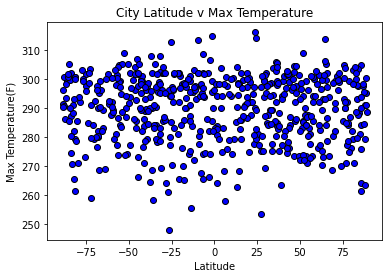

In [47]:
latitude= citydf['Lat']
Temp = citydf['Max Temp']
plt.title("City Latitude v Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.scatter(latitude, Temp, marker="o", facecolors="blue", edgecolors="black")

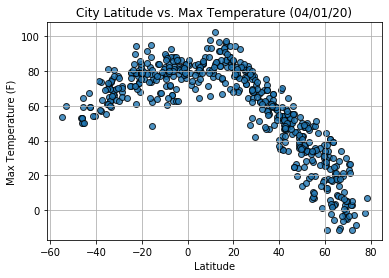

## Latitude vs. Humidity Plot

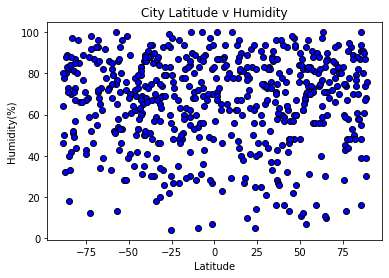

In [48]:
latitude
Humid = citydf['Humidity']
plt.title("City Latitude v Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.scatter(latitude, Humid, marker="o", facecolors="blue", edgecolors="black")

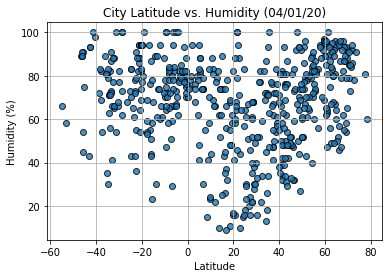

## Latitude vs. Cloudiness Plot

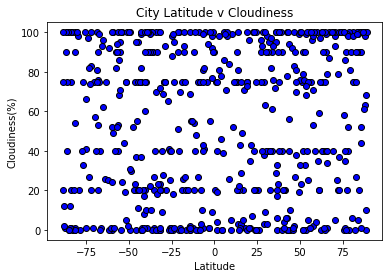

In [49]:
latitude
Cloudy = citydf['Cloudiness']
plt.title("City Latitude v Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.scatter(latitude, Cloudy, marker="o", facecolors="blue", edgecolors="black")

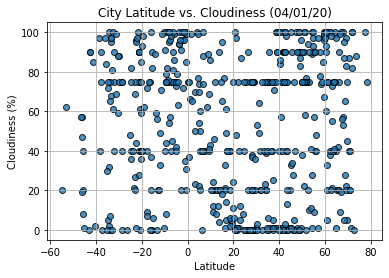

## Latitude vs. Wind Speed Plot

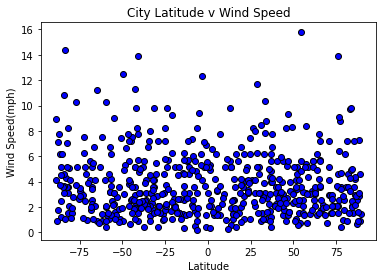

In [50]:
latitude
Windy = citydf['Wind Speed']
plt.title("City Latitude v Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.scatter(latitude, Windy, marker="o", facecolors="blue", edgecolors="black")

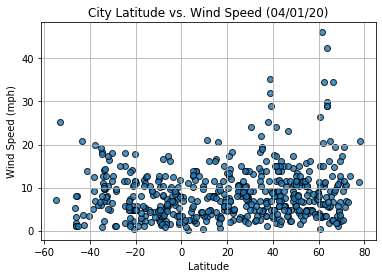

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [52]:
northern_hemisphere = citydf[citydf['Lat']>0]
northern_hemisphere

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,illoqqortoormiut,86.088628,-29.659653,264.05,91,100,4.17,RU,1619194190
2,cherskiy,75.813948,163.464228,293.15,60,0,4.63,ZA,1619193686
5,vila franca do campo,33.198770,-23.880723,298.71,37,40,3.09,MX,1619194015
6,cabo san lucas,13.138538,-114.485395,290.37,94,75,5.66,PT,1619194191
7,colares,37.728275,-14.270735,275.15,80,75,7.72,NO,1619194191
...,...,...,...,...,...,...,...,...,...
555,buraydah,41.710982,80.590149,297.04,76,6,4.24,AU,1619194351
557,guangyuan,72.771253,-44.622122,302.15,70,20,2.06,MG,1619194352
559,namatanai,37.640098,-1.805427,283.76,26,100,4.32,CN,1619194352
560,kieta,16.269275,-69.344929,297.00,60,49,1.40,ZM,1619194353


The r-value is:0.0147853208773972


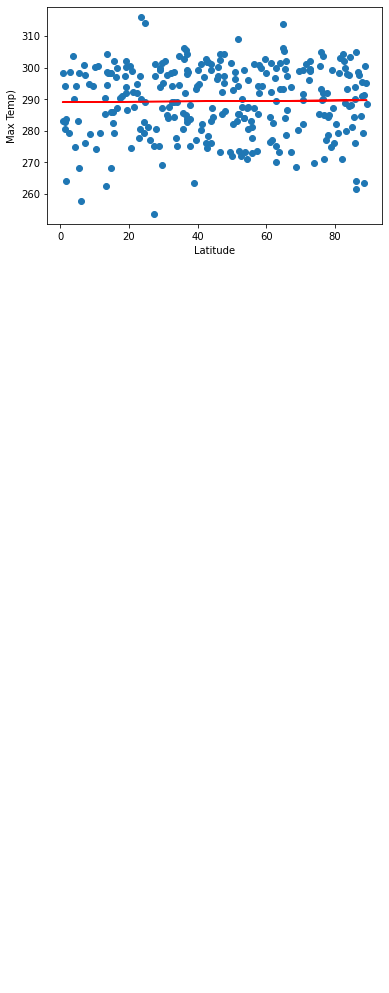

In [63]:
x_valuesLT = northern_hemisphere['Lat']
y_valuesLT = northern_hemisphere['Max Temp']
(slopeLT, interceptLT, rvalueLT, pvalueLT, stderrLT) = linregress(x_valuesLT, y_valuesLT)
regress_valuesLT = x_valuesLT * slopeLT + interceptLT
line_eqLT = "y = " + str(round(slopeLT,2)) + "x + " + str(round(interceptLT,2))


print("The r-value is:"+ str(rvalueLT))
plt.scatter(x_valuesLT,y_valuesLT)
plt.plot(x_valuesLT,regress_valuesLT,"r-")
plt.annotate(line_eqLT,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp)')
plt.show()

The r-value is: 0.46937863826630627


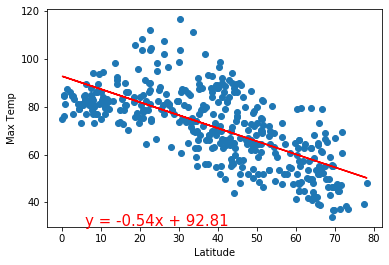

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [57]:
southern_hemisphere = citydf[citydf['Lat']<0]

The r-value is:-0.0031312084042479905


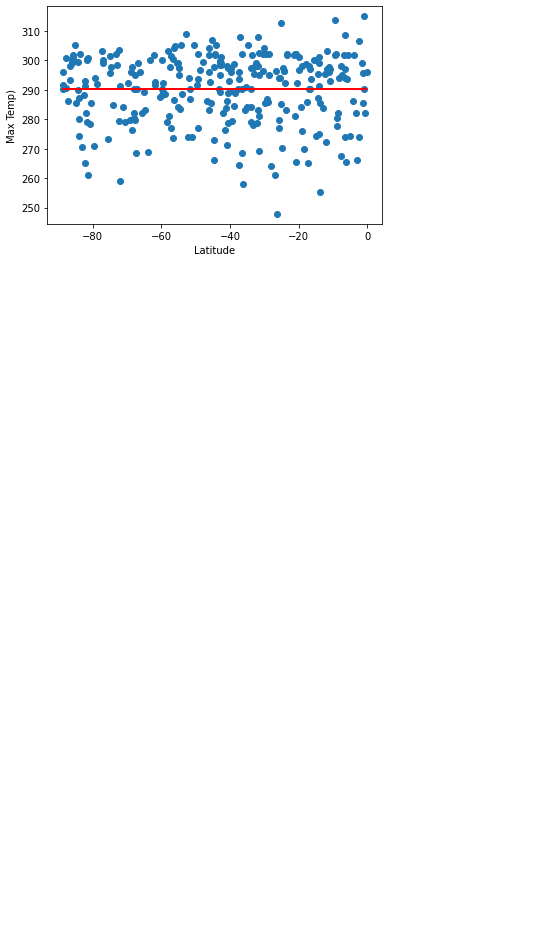

In [64]:
x_valuesST = southern_hemisphere['Lat']
y_valuesST = southern_hemisphere['Max Temp']
(slopeST, interceptST, rvalueST, pvalueST, stderrST) = linregress(x_valuesST, y_valuesST)
regress_valuesST = x_valuesST * slopeST + interceptST
line_eqST = "y = " + str(round(slopeST,2)) + "x + " + str(round(interceptST,2))


print("The r-value is:"+ str(rvalueST))
plt.scatter(x_valuesST,y_valuesST)
plt.plot(x_valuesST,regress_valuesST,"r-")
plt.annotate(line_eqST,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp)')
plt.show()

The r-value is: 0.6082708688906918


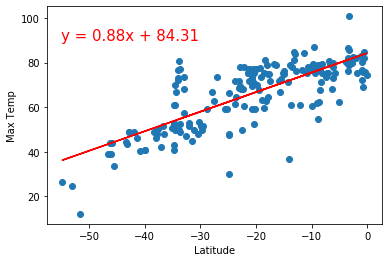

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is:0.04454807982879645


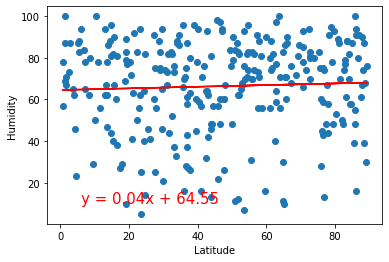

In [65]:
x_valuesHT = northern_hemisphere['Lat']
y_valuesHT = northern_hemisphere['Humidity']
(slopeHT, interceptHT, rvalueHT, pvalueHT, stderrHT) = linregress(x_valuesHT, y_valuesHT)
regress_valuesHT = x_valuesHT * slopeHT + interceptHT
line_eqHT = "y = " + str(round(slopeHT,2)) + "x + " + str(round(interceptHT,2))


print("The r-value is:"+ str(rvalueHT))
plt.scatter(x_valuesHT,y_valuesHT)
plt.plot(x_valuesHT,regress_valuesHT,"r-")
plt.annotate(line_eqHT,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

The r-value is: 0.000543987878808455


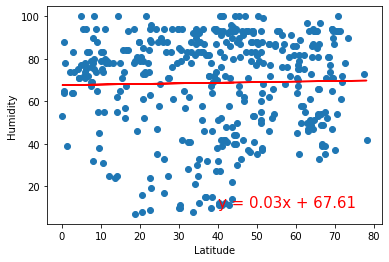

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is:-0.07682500778522507


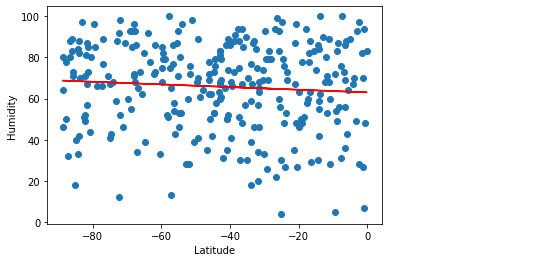

In [66]:
x_valuesSH = southern_hemisphere['Lat']
y_valuesSH = southern_hemisphere['Humidity']
(slopeSH, interceptSH, rvalueSH, pvalueSH, stderrSH) = linregress(x_valuesSH, y_valuesSH)
regress_valuesSH = x_valuesSH * slopeSH + interceptSH
line_eqSH = "y = " + str(round(slopeSH,2)) + "x + " + str(round(interceptSH,2))


print("The r-value is:"+ str(rvalueSH))
plt.scatter(x_valuesSH,y_valuesSH)
plt.plot(x_valuesSH,regress_valuesSH,"r-")
plt.annotate(line_eqSH,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

The r-value is: 0.014985174297345524


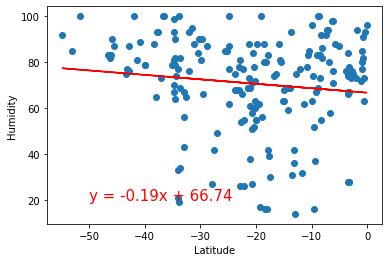

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is:0.15321239935838674


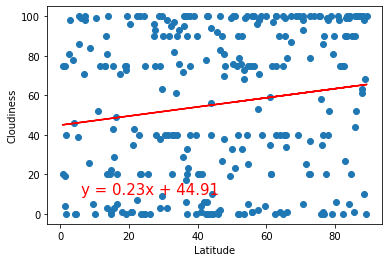

In [67]:
x_valuesNC = northern_hemisphere['Lat']
y_valuesNC = northern_hemisphere['Cloudiness']
(slopeNC, interceptNC, rvalueNC, pvalueNC, stderrNC) = linregress(x_valuesNC, y_valuesNC)
regress_valuesNC = x_valuesNC * slopeNC + interceptNC
line_eqNC = "y = " + str(round(slopeNC,2)) + "x + " + str(round(interceptNC,2))


print("The r-value is:"+ str(rvalueNC))
plt.scatter(x_valuesNC,y_valuesNC)
plt.plot(x_valuesNC,regress_valuesNC,"r-")
plt.annotate(line_eqNC,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

The r-value is: 0.0020898727664228514


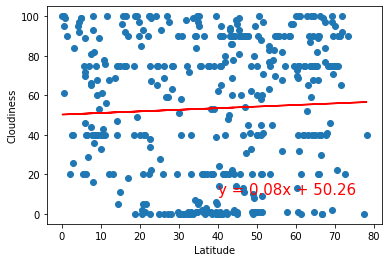

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is:-0.023337124737859732


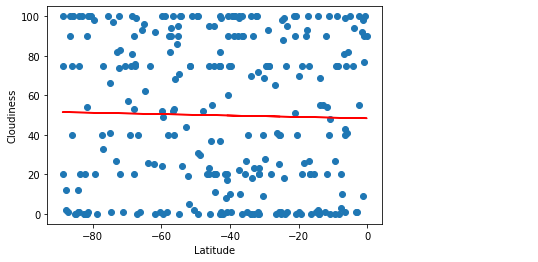

In [68]:
x_valuesSC = southern_hemisphere['Lat']
y_valuesSC = southern_hemisphere['Cloudiness']
(slopeSC, interceptSC, rvalueSC, pvalueSC, stderrSC) = linregress(x_valuesSC, y_valuesSC)
regress_valuesSC = x_valuesSC * slopeSC + interceptSC
line_eqSC = "y = " + str(round(slopeSC,2)) + "x + " + str(round(interceptSC,2))


print("The r-value is:"+ str(rvalueSC))
plt.scatter(x_valuesSC,y_valuesSC)
plt.plot(x_valuesSC,regress_valuesSC,"r-")
plt.annotate(line_eqSC,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

The r-value is: 0.0035263772085582894


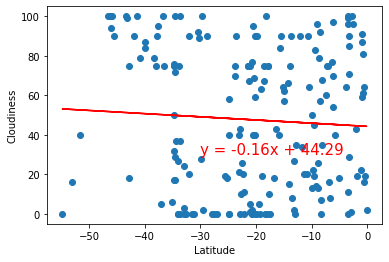

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is:0.013685058016852594


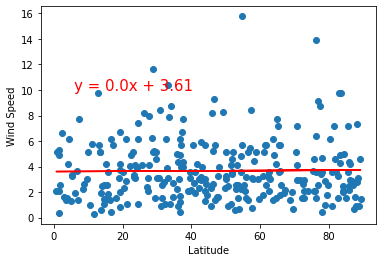

In [70]:
x_valuesNW = northern_hemisphere['Lat']
y_valuesNW = northern_hemisphere['Wind Speed']
(slopeNW, interceptNW, rvalueNW, pvalueNW, stderrNW) = linregress(x_valuesNW, y_valuesNW)
regress_valuesNW = x_valuesNW * slopeNW + interceptNW
line_eqNW = "y = " + str(round(slopeNW,2)) + "x + " + str(round(interceptNW,2))


print("The r-value is:"+ str(rvalueNW))
plt.scatter(x_valuesNW,y_valuesNW)
plt.plot(x_valuesNW,regress_valuesNW,"r-")
plt.annotate(line_eqNW,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

The r-value is: 0.04019723576144484


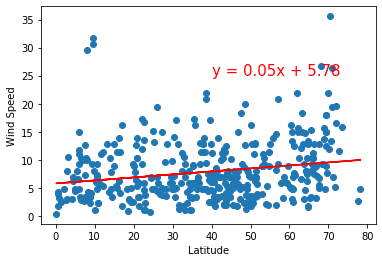

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is:-0.041468985385526444


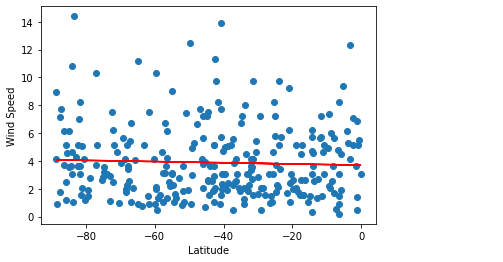

In [71]:
x_valuesSW = southern_hemisphere['Lat']
y_valuesSW = southern_hemisphere['Wind Speed']
(slopeSW, interceptSW, rvalueSW, pvalueSW, stderrSW) = linregress(x_valuesSW, y_valuesSW)
regress_valuesSW = x_valuesSW * slopeSW + interceptSW
line_eqSW = "y = " + str(round(slopeSW,2)) + "x + " + str(round(interceptSW,2))


print("The r-value is:"+ str(rvalueSW))
plt.scatter(x_valuesSW,y_valuesSW)
plt.plot(x_valuesSW,regress_valuesSW,"r-")
plt.annotate(line_eqSW,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

The r-value is: 0.017128274759839232


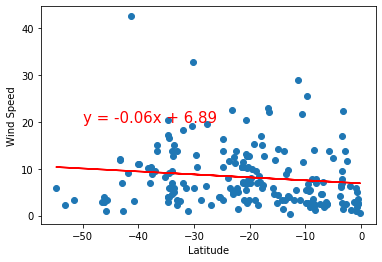